<a href="https://colab.research.google.com/github/pitimonb/coal_analysis/blob/test-new-dataset/coal_analysis_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Enviroment

In [182]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import time
from tensorflow import keras
from tensorflow.keras import layers

# Setup State
y = yes
n = no

In [183]:
train_state = 'y'
early_stop_state = 'y'
save_state = 'y'
load_state = 'y'
model_num = 3
coal_prop = ['Carbon','Hydrogen','Nitrogen']

In [184]:
if save_state == 'y':
  !pip install tensorflowjs

# Import Dataset using pandas

In [185]:
car_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/test-new-dataset/dataset/coal_car_ds.csv"
hyd_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/test-new-dataset/dataset/coal_hyd_ds.csv"
nit_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/test-new-dataset/dataset/coal_nit_ds.csv"

car_dataset = pd.read_csv(car_dataset_url)
hyd_dataset = pd.read_csv(hyd_dataset_url)
nit_dataset = pd.read_csv(nit_dataset_url)


In [186]:
dataset = [car_dataset,hyd_dataset,nit_dataset]

# Clean data

In [187]:
car_dataset.isna().sum()

p_mois    0
p_vol     0
p_ash     0
p_car     0
p_sul     0
u_car     0
dtype: int64

In [188]:
hyd_dataset.isna().sum()

p_mois    0
p_vol     0
p_ash     0
p_car     0
p_sul     0
u_hyd     0
dtype: int64

In [189]:
nit_dataset.isna().sum()

p_mois    0
p_vol     0
p_ash     0
p_car     0
p_sul     0
u_nit     0
dtype: int64

# Input Data

In [190]:
#input_data = {'p_mois':[17.3],'p_vol':[33.55],'p_ash':[27.56],'p_car':[21.17],'p_sul':[2.4]} #USe
input_data = {'p_mois':[17.73],'p_vol':[33.55],'p_ash':[27.56],'p_car':[21.17],'p_sul':[2.4]}
input_data = pd.DataFrame(data = input_data)
#print(input_data)

# Split data into Train and Test

In [191]:
ds_frac = 0.8
def train_ds(x):
  return (x.sample(frac = ds_frac,random_state = 0))
def test_ds (x):
  return x.drop((x.sample(frac = ds_frac,random_state = 0)).index)

In [192]:
train_dataset = [1,2,3]
for i in range(model_num):
  train_dataset[i] = train_ds(dataset[i])
test_dataset = [1,2,3]
for i in range (model_num):
  test_dataset[i] = test_ds(dataset[i])

#print(train_dataset[2])
#print(test_dataset[2])

# Inspect Data

In [193]:
#sns.pairplot(train_dataset[0][["p_mois","p_vol","p_ash","p_car","p_sul","u_car"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[1][["p_mois","p_vol","p_ash","p_car","p_sul","u_hyd"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[2][["p_mois","p_vol","p_ash","p_car","p_sul","u_nit"]], diag_kind="kde")# Use

# Overall Stat

In [194]:
train_stats = [1,2,3]
train_pop = ["u_car","u_hyd","u_nit"]
for i in range(model_num):
  train_stats[i] = train_dataset[i].describe()
  train_stats[i].pop(str(train_pop[i]))
  train_stats[i] = train_stats[i].transpose()
train_stats[1]

,count,mean,std,min,25%,50%,75%,max
p_mois,1994.0,13.878108,2.556621,6.870,12.09000,13.9350,15.60875,23.130
p_vol,1994.0,33.487494,1.800194,27.220,32.23000,33.4800,34.66375,39.680
p_ash,1994.0,31.746094,4.402355,17.590,29.05625,32.1625,34.96500,44.845
p_car,1994.0,20.888305,2.839729,13.275,18.91125,20.5200,22.73875,30.720
p_sul,1994.0,3.418764,0.456924,2.010,3.12000,3.4175,3.69400,4.987


# Split feature form label
Separate the target value (label) form feature. Label = value that train model to predict.

In [195]:
train_label = [1,2,3]
test_label = [1,2,3]
for i in range(model_num):
  train_label[i] = train_dataset[i].pop(str(train_pop[i]))
  test_label[i] = test_dataset[i].pop(str(train_pop[i]))

#print(train_label[1])
#print(test_label[1])

# Normalize Data

In [196]:
normed_train_data = [1,2,3]
normed_test_data = [1,2,3]
normed_input_data = [1,2,3]
for i in range(model_num):
  normed_train_data[i] = (train_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_test_data[i] = (test_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_data[i] = (input_data - train_stats[i]['mean']) / train_stats[i]['std']
#print(normed_train_data[1])
#print(normed_test_data[1])
#print(normed_input_data[0])
#print(train_stats[0]['mean'])
#print(train_stats[0]['std'])

# The Model

In [197]:
def build_model_1(x):
  model = keras.Sequential([
    layers.Dense(512,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [198]:
def build_model_2(x):
  model = keras.Sequential([
    layers.Dense(1024,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [199]:
def build_model_3(x):
  model = keras.Sequential([
    layers.Dense(64,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(32,activation = tf.nn.relu),
    #layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [200]:
model_pre = [1,2,3]
for i in range(model_num):
  model_pre[i] = build_model_3(train_dataset[i])

#Train Model
Train model for 1000 epochs, and recoed the training and validation accuracy in the history object.

In [201]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')
  
EPOCHS = 1500

In [202]:
history = [1,2,3]
if train_state == 'y':
  if early_stop_state == 'y':
    for i in range(model_num):
      early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [early_stop, PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
  else:
    for i in range(model_num):
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
else:
  print('Not train')


.................................... Finish train model: Carbon

................................ Finish train model: Hydrogen

................................ Finish train model: Nitrogen


Visualize the model's training progress using the stat stored in the History object.

In [203]:
def plot_history(history):

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Abs Error [Output]')
  plt.plot(hist['epoch'], hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Square Error [$Output^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

************************************************************************************
Carbon
        loss       mae       mse  val_loss   val_mae   val_mse  epoch
31  0.841988  0.571972  0.841988  1.290367  0.603527  1.290367     31
32  0.841752  0.580873  0.841752  1.307946  0.642794  1.307946     32
33  0.808664  0.563735  0.808664  1.719461  0.837075  1.719461     33
34  0.820030  0.562739  0.820030  1.379883  0.630470  1.379883     34
35  0.818055  0.570240  0.818055  1.296307  0.649297  1.296307     35
************************************************************************************
Hydrogen
        loss       mae       mse  val_loss   val_mae   val_mse  epoch
27  0.085224  0.220862  0.085224  0.113077  0.253661  0.113077     27
28  0.086928  0.220923  0.086928  0.145444  0.293376  0.145444     28
29  0.085138  0.220092  0.085138  0.103071  0.238313  0.103071     29
30  0.085829  0.220054  0.085829  0.107455  0.244321  0.107455     30
31  0.084280  0.218440  0.084280  0.109769  

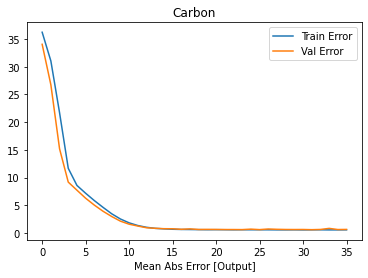

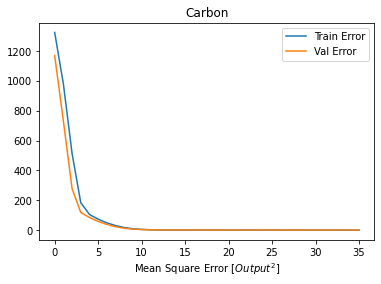

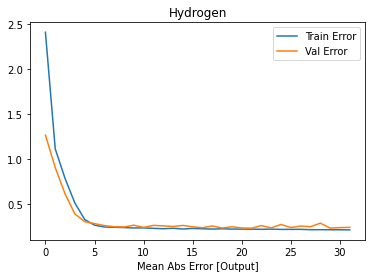

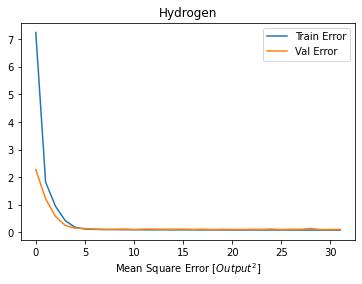

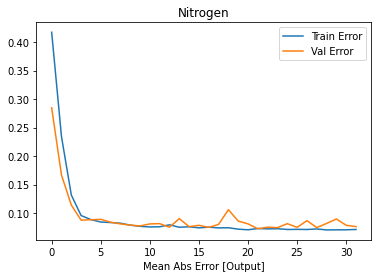

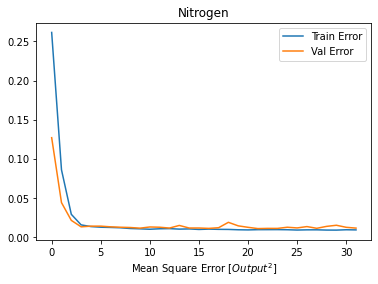

In [204]:
hist = [1,2,3]
if train_state == 'y':
  for i in range(model_num):
    hist[i] = pd.DataFrame(history[i].history)
    hist[i]['epoch'] = history[i].epoch
    print('************************************************************************************')
    print(coal_prop[i])
    print(hist[i].tail())
    #plot_history(history[i],coal_prop[i])
    plot_history(history[i])
else:
  print()

In [205]:
rmse_val = [1,2,3]
for i in range(model_num):
  loss_val, mae_val, mse_val = model_pre[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
  rmse_val[i] = math.sqrt(mse_val)
  print(coal_prop[i])
  print("Testing set Mean Abs Error: {:5.2f}".format(mae_val))
  print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val)))
  print('**********************************************************')


Carbon
Testing set Mean Abs Error:  0.57
Testing set RMSE:  0.85
**********************************************************
Hydrogen
Testing set Mean Abs Error:  0.23
Testing set RMSE:  0.31
**********************************************************
Nitrogen
Testing set Mean Abs Error:  0.08
Testing set RMSE:  0.10
**********************************************************


# Make Prediction
Predict Output value using data in testing set

In [206]:
test_pred = [1,2,3]
for i in range(model_num):
  test_pred[i] = model_pre[i].predict(normed_test_data[i]).flatten()

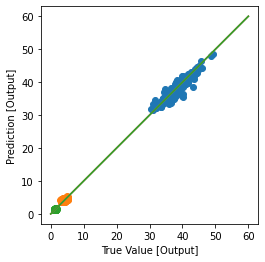

In [207]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  #plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,60], [0,60])

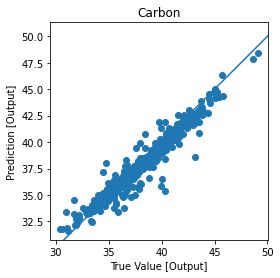

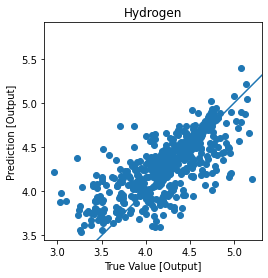

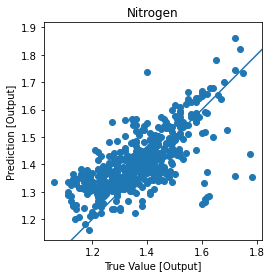

In [208]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,100], [0,100])
  plt.show()

# Save Model

In [209]:
model_save_name = ['car_model.h5','hyd_model.h5','nit_model.h5']
if save_state == 'y':
  for i in range(model_num):
    model_pre[i].save(model_save_name[i])
    !tensorflowjs_converter --input_format=keras /content/car_model.h5 /content/js/car
    !tensorflowjs_converter --input_format=keras /content/hyd_model.h5 /content/js/hyd
    !tensorflowjs_converter --input_format=keras /content/nit_model.h5 /content/js/nit
  print("Model Saved")
else:
  print("Not save model") 

model_prod = [1,2,3]
if load_state =='y':
  for i in range(model_num):
    model_prod[i] = keras.models.load_model(model_save_name[i])
  print("Model Load")
else:
  print("Not load model Prod")

2021-02-18 08:28:02.459638: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:05.377244: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:08.517898: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:11.460585: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:14.394694: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:17.328230: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 08:28:20.282483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

In [210]:
!ls

car_model.h5  hyd_model.h5  js	nit_model.h5  sample_data


In [211]:
rmse_val_prod = [1,2,3]
if load_state =='y':
  for i in range(model_num):
    loss_val_prod, mae_val_prod, mse_val_prod = model_prod[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
    rmse_val_prod[i] = math.sqrt(mse_val_prod)
    print(coal_prop[i])
    print("Testing set Mean Abs Error: {:5.2f}".format(mae_val_prod))
    print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val_prod)))
    print('**********************************************************')
else:
  print("Not load model Prod")

Carbon
Testing set Mean Abs Error:  0.57
Testing set RMSE:  0.85
**********************************************************
Hydrogen
Testing set Mean Abs Error:  0.23
Testing set RMSE:  0.31
**********************************************************
Nitrogen
Testing set Mean Abs Error:  0.08
Testing set RMSE:  0.10
**********************************************************


# Data Input Result

In [212]:
print(normed_input_data[0])

     p_mois     p_vol     p_ash     p_car     p_sul
0  1.506634  0.034722 -0.950876  0.099198 -2.229612


In [213]:
input_data_pred = model_pre[0].predict(normed_input_data[0])
input_data_pred

array([[37.933483]], dtype=float32)

In [214]:
input_data_pred = [1,2,3]
print('Pre-production Model:')
for i in range(model_num):
  input_data_pred[i] = model_pre[i].predict(normed_input_data[i]).flatten()
  input_data_pred[i] = float(input_data_pred[i])
  print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val[i]))
print('***************************************************************************************')
print('Prodution Model:')
if load_state =='y':
  for i in range(model_num):
    input_data_pred[i] = model_prod[i].predict(normed_input_data[i]).flatten()
    input_data_pred[i] = float(input_data_pred[i])
    print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))
else:
  print("Not load model Prod")

Pre-production Model:
Carbon: 37.933  ,RMSE: 0.850
Hydrogen: 4.777  ,RMSE: 0.309
Nitrogen: 1.546  ,RMSE: 0.103
***************************************************************************************
Prodution Model:
Carbon: 37.933  ,RMSE: 0.850
Hydrogen: 4.777  ,RMSE: 0.309
Nitrogen: 1.546  ,RMSE: 0.103
